In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
mean = df['Age'].mean()
df['Age'].fillna(value = mean, inplace = True)

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna(value = 'Q', inplace = True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

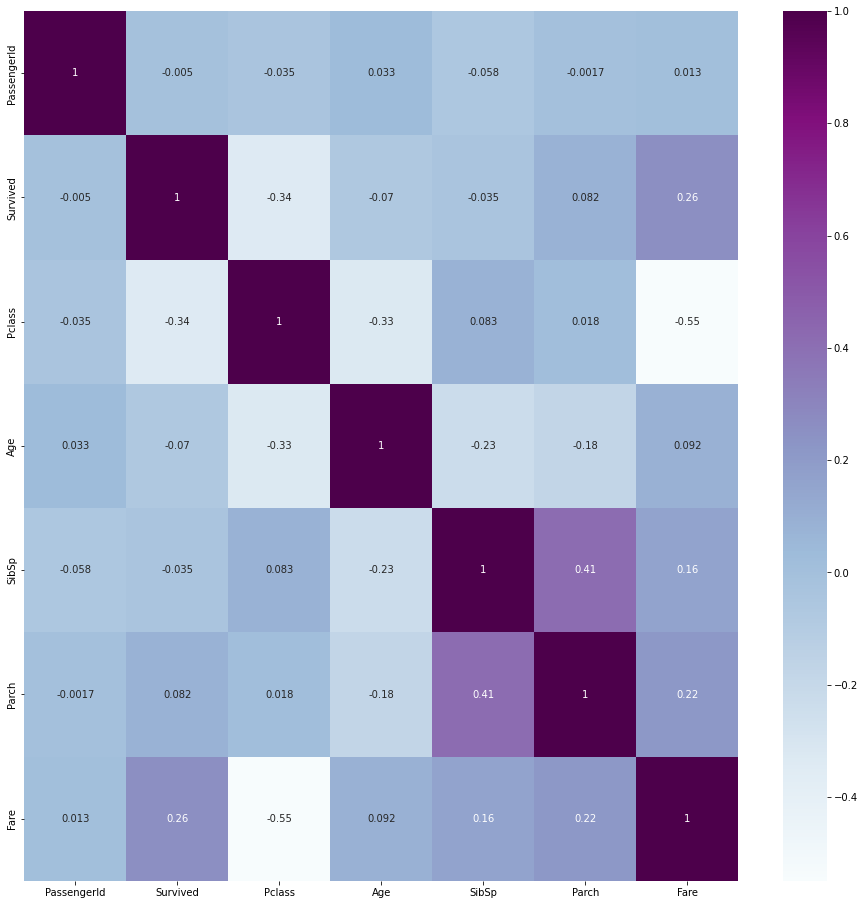

In [14]:
df.corr()
plt.figure(figsize=(16,16))
plot = sb.heatmap(df.corr(),cmap='BuPu',annot = True)
plt.show()

In [15]:
df = df.drop(columns=['Cabin','Name'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

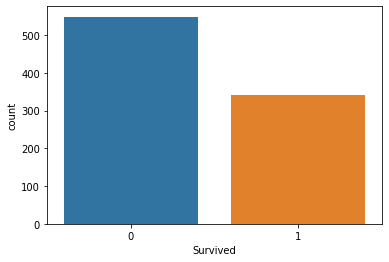

In [17]:
sb.countplot(x = "Survived",data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

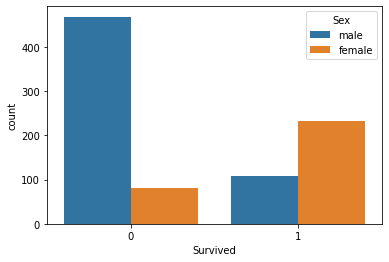

In [18]:
sb.countplot(x = "Survived", hue = "Sex", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

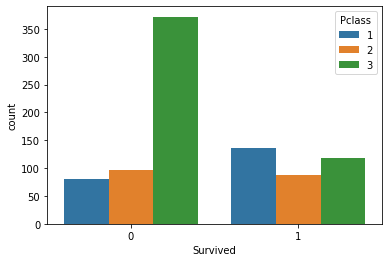

In [19]:
sb.countplot(x = "Survived", hue = "Pclass", data = df)

<AxesSubplot:ylabel='Frequency'>

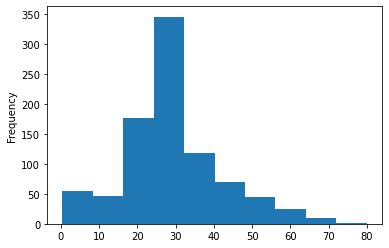

In [20]:
df["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

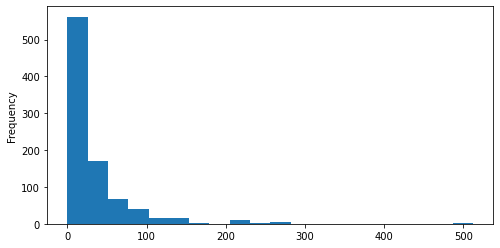

In [21]:
df["Fare"].plot.hist( bins=20  , figsize = (8,4))

<AxesSubplot:xlabel='Parch', ylabel='count'>

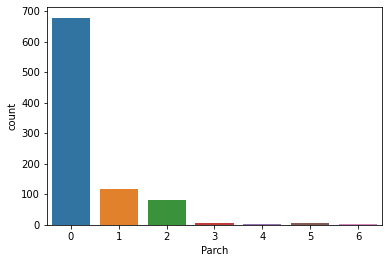

In [22]:
sb.countplot(x = "Parch",data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

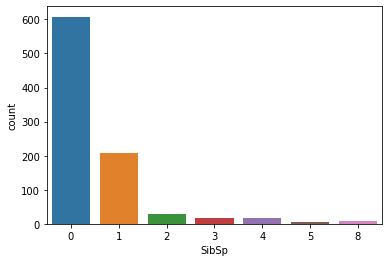

In [23]:
sb.countplot(x = "SibSp",data = df)

<AxesSubplot:>

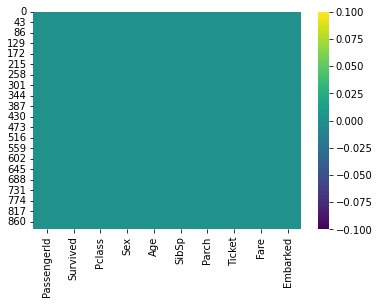

In [24]:
sb.heatmap(df.isnull(),cmap="viridis")

In [25]:
from sklearn.preprocessing import OneHotEncoder

df['Sex']=df['Sex'].astype('category')
df['sex']=df['Sex'].cat.codes
df['Embarked']=df['Embarked'].astype('category')
df['embraked']=df['Embarked'].cat.codes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,embraked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    category
 10  sex          891 non-null    int8    
 11  embraked     891 non-null    int8    
dtypes: category(2), float64(2), int64(5), int8(2), object(1)
memory usage: 59.5+ KB


In [27]:
df.embraked.value_counts()

2    644
0    168
1     79
Name: embraked, dtype: int64

In [28]:
df = df.drop(columns=['Embarked','Sex','PassengerId'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   sex       891 non-null    int8   
 8   embraked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2), object(1)
memory usage: 50.6+ KB


In [30]:
df = df.drop(columns=['Ticket'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   sex       891 non-null    int8   
 7   embraked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [32]:
column = df.pop('Survived')

In [33]:
df.insert(7, 'Survived', column)


In [34]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,sex,embraked,Survived
0,3,22.0,1,0,7.2500,1,2,0
1,1,38.0,1,0,71.2833,0,0,1
2,3,26.0,0,0,7.9250,0,2,1
3,1,35.0,1,0,53.1000,0,2,1
4,3,35.0,0,0,8.0500,1,2,0


In [35]:
x = df.iloc[:,0:7]
x

,Pclass,Age,SibSp,Parch,Fare,sex,embraked
0,3,22.000000,1,0,7.2500,1,2
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,0,2
3,1,35.000000,1,0,53.1000,0,2
4,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,2
887,1,19.000000,0,0,30.0000,0,2
888,3,29.699118,1,2,23.4500,0,2
889,1,26.000000,0,0,30.0000,1,0


In [36]:
print(x.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex', 'embraked'], dtype='object')


In [37]:
y = df.iloc[:,7]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 8)

In [39]:
from sklearn.preprocessing import StandardScaler 
func = StandardScaler()
func.fit(x_train)
transf_train = func.transform(x_train)
transf_test = func.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold

model_1  = LogisticRegression(penalty = 'l2',solver = 'liblinear')
model_1.fit(transf_train,y_train)

kfold = KFold(n_splits = 10)
scores = cross_val_score(model_1,x,y,cv = kfold)

In [41]:
kfold = KFold(n_splits = 10)
scores = cross_val_score(model_1,x,y,cv = kfold)

In [42]:
print(f'The cross validation scores for Logistic model_1 is:{scores}')
print(f'The mean of cross_val_scores:{scores.mean()}')

The cross validation scores for Logistic model_1 is:[0.77777778 0.83146067 0.76404494 0.80898876 0.76404494 0.78651685
 0.76404494 0.75280899 0.85393258 0.80898876]
The mean of cross_val_scores:0.7912609238451935


In [43]:
preds_1 = model_1.predict(transf_test)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

print("Accuracy of Logistic model is: ",accuracy_score(y_test,preds_1))
print("Logistic model Classification report: ","\n",classification_report(y_test,preds_1))
print("Confusion matrix for Logistic model:","\n",confusion_matrix(y_test,preds_1))

Accuracy of Logistic model is:  0.7597765363128491
Logistic model Classification report:  
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       108
           1       0.73      0.62      0.67        71

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

Confusion matrix for Logistic model: 
 [[92 16]
 [27 44]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

x = df.iloc[:,0:7].values
y = df.iloc[:,7].values 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 8)

model_2  = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=7,max_features= 'sqrt')

model_2.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       random_state=7)

In [46]:
kfold = KFold(n_splits = 10)
scores = cross_val_score(model_2,x,y,cv = kfold)

In [47]:
print(f'The cross validation scores for DecisionTreeClassifier model_2 is:{scores}')
print(f'The mean of cross_val_scores:{scores.mean()}')

The cross validation scores for DecisionTreeClassifier model_2 is:[0.73333333 0.83146067 0.71910112 0.7752809  0.75280899 0.76404494
 0.75280899 0.75280899 0.85393258 0.7752809 ]
The mean of cross_val_scores:0.7710861423220974


In [48]:
preds_2 = model_2.predict(transf_test)

In [49]:
print("Accuracy of DecisionTreeClassifier model is: ",accuracy_score(y_test,preds_2))
print("DecisionTreeClassifier model Classification report: ","\n",classification_report(y_test,preds_2))
print("Confusion matrix for DecisionTreeClassifier model:","\n",confusion_matrix(y_test,preds_2))

Accuracy of DecisionTreeClassifier model is:  0.7206703910614525
DecisionTreeClassifier model Classification report:  
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       108
           1       0.70      0.52      0.60        71

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.72      0.72      0.71       179

Confusion matrix for DecisionTreeClassifier model: 
 [[92 16]
 [34 37]]


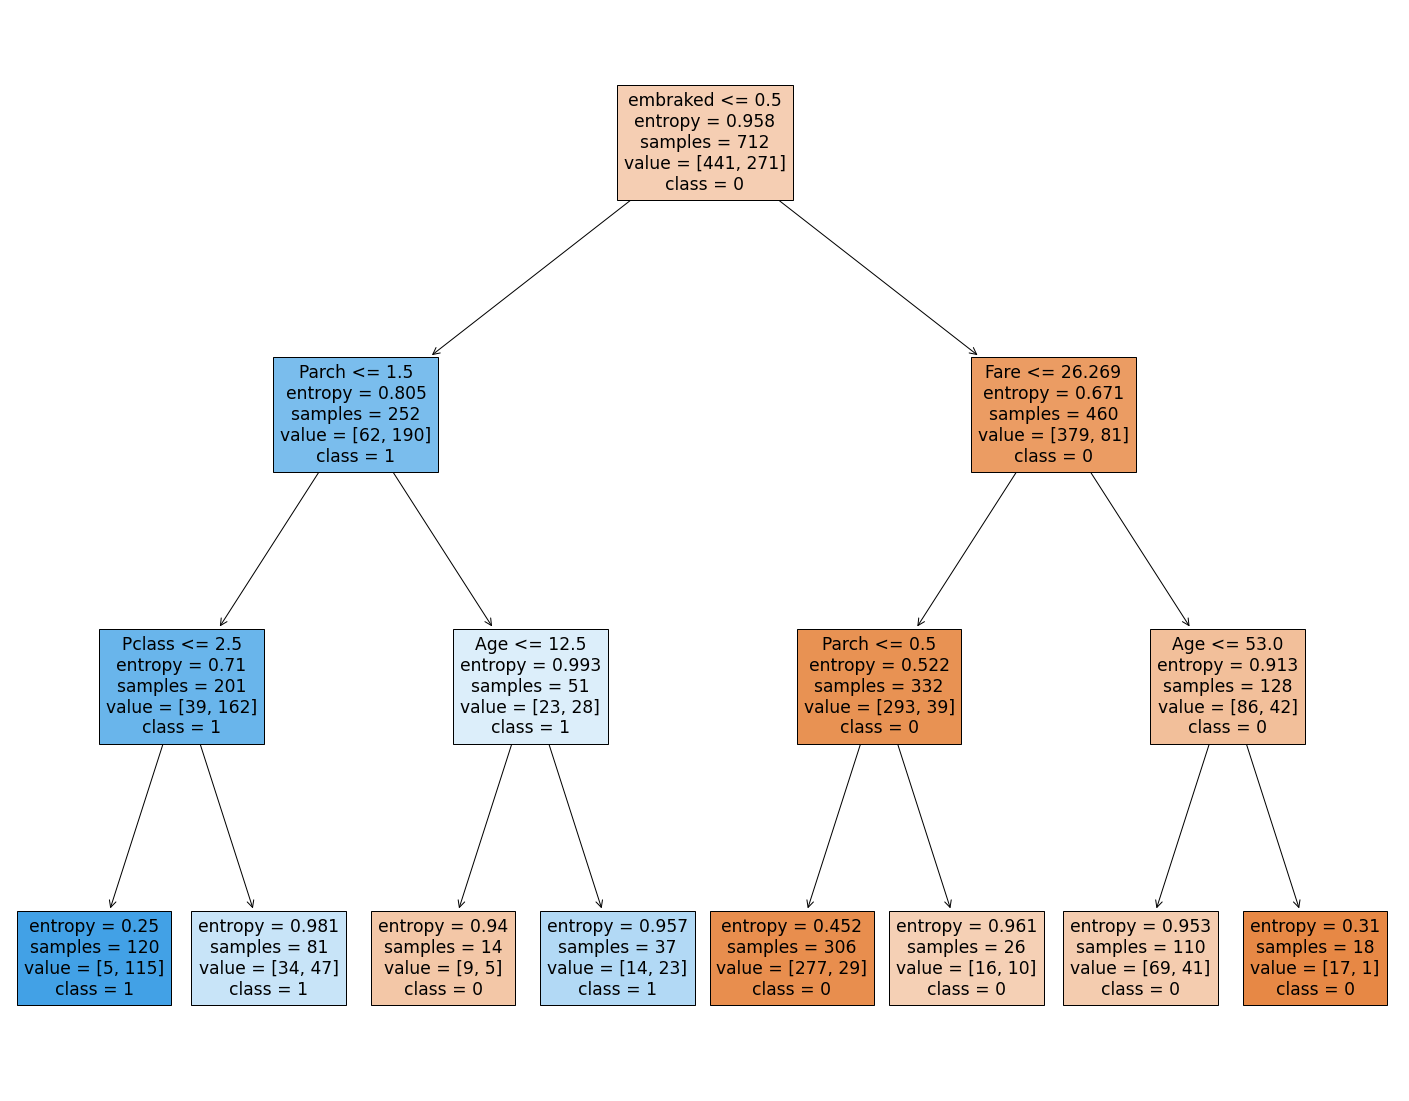

In [50]:
from sklearn import tree 
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_2, 
                   feature_names = ["Pclass","Age","SibSp","Parch","Fare",'embraked'],  
                   class_names=["0","1"],
                   filled=True)

In [51]:
from sklearn.svm import SVC


x = df.iloc[:,0:7].values
y = df.iloc[:,7].values 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 8)

model_3  = SVC(kernel = 'linear')
model_3.fit(x_train,y_train)



SVC(kernel='linear')

In [52]:
kfold = KFold(n_splits = 10)
scores = cross_val_score(model_3,x,y,cv = kfold)

In [53]:
print(f'The cross validation scores for SVC model_3 is:{scores}')
print(f'The mean of cross_val_scores:{scores.mean()}')

The cross validation scores for SVC model_3 is:[0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]
The mean of cross_val_scores:0.786729088639201


In [54]:
preds_3 = model_3.predict(transf_test)

In [55]:
print("Accuracy of SVC model is: ",accuracy_score(y_test,preds_3))
print("SVC model Classification report: ","\n",classification_report(y_test,preds_3))
print("Confusion matrix for SVC model:","\n",confusion_matrix(y_test,preds_3))

Accuracy of SVC model is:  0.7374301675977654
SVC model Classification report:  
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       108
           1       0.68      0.63      0.66        71

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.73      0.74      0.74       179

Confusion matrix for SVC model: 
 [[87 21]
 [26 45]]


In [56]:
from sklearn.metrics import accuracy_score

train_Acc = accuracy_score(y_train,model_1.predict(transf_train))
print("Train_accuracy of model_1: ",train_Acc)

train_Acc_2 = accuracy_score(y_train,model_2.predict(transf_train))
print("Train_accuracy of model_2: ",train_Acc_2)

train_Acc_3 = accuracy_score(y_train,model_3.predict(transf_train))
print("Train_accuracy of model_3: ",train_Acc_3)

Train_accuracy of model_1:  0.8160112359550562
Train_accuracy of model_2:  0.7921348314606742
Train_accuracy of model_3:  0.7879213483146067


In [57]:

test_Acc = accuracy_score(y_test,preds_1)
print("Test_accuracy of model_1: ",test_Acc)


test_Acc_2 = accuracy_score(y_train,model_2.predict(transf_train))
print("Test_accuracy of model_2: ",test_Acc_2)


test_Acc_3 = accuracy_score(y_train,model_3.predict(transf_train))
print("Test_accuracy of model_3: ",test_Acc_3)

Test_accuracy of model_1:  0.7597765363128491
Test_accuracy of model_2:  0.7921348314606742
Test_accuracy of model_3:  0.7879213483146067


In [58]:
df_1 = test

In [59]:
df_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
df_1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
mean = df_1['Age'].mean()
mean = df_1['Fare'].mean()
df_1['Age'].fillna(value = mean, inplace = True)
df_1['Fare'].fillna(value = mean, inplace = True)

In [62]:
df_1 = df_1.drop(columns=['Cabin','Name','PassengerId'])

In [63]:
df_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [64]:
from sklearn.preprocessing import OneHotEncoder

df_1['Sex']=df_1['Sex'].astype('category')
df_1['sex']=df_1['Sex'].cat.codes
df_1['Embarked']=df_1['Embarked'].astype('category')
df_1['embraked']=df_1['Embarked'].cat.codes
df_1.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,embraked
0,3,male,34.5,0,0,330911,7.8292,Q,1,1
1,3,female,47.0,1,0,363272,7.0000,S,0,2
2,2,male,62.0,0,0,240276,9.6875,Q,1,1
3,3,male,27.0,0,0,315154,8.6625,S,1,2
4,3,female,22.0,1,1,3101298,12.2875,S,0,2


In [65]:
df_1 = df_1.drop(columns=['Embarked','Sex','Ticket'])

In [66]:
df_1.shape

(418, 7)

In [67]:
df.shape

(891, 8)

In [68]:
submission= pd.read_csv("../input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [69]:
submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [70]:
submission.drop(['PassengerId'], axis=1, inplace=True)
submission.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [71]:
test_predictions_1= model_1.predict(df_1)
test_predictions_2= model_2.predict(df_1)
test_predictions_3= model_3.predict(df_1)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [72]:
test_predictions_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
print("Accuracy of Logistic model on test.csv is: ",accuracy_score(submission,test_predictions_1,normalize=True))
print("Accuracy of DecisionTreeClassifier on test.csv is: ",accuracy_score(submission,test_predictions_2,normalize=True))
print("Accuracy of SVC on test.csv is: ",accuracy_score(submission,test_predictions_3,normalize=True))

Accuracy of Logistic model on test.csv is:  0.6578947368421053
Accuracy of DecisionTreeClassifier on test.csv is:  0.9904306220095693
Accuracy of SVC on test.csv is:  0.992822966507177


In [74]:
temp_1= pd.DataFrame(test_predictions_1, columns= ['Survived'])
temp_2= pd.DataFrame(test_predictions_2, columns= ['Survived'])
temp_3= pd.DataFrame(test_predictions_3, columns= ['Survived'])

In [75]:
test_for_sub= pd.read_csv("../input/titanic/test.csv")
final_sub_model_1= pd.DataFrame()
final_sub_model_1['PassengerId']= test_for_sub['PassengerId']
final_sub_model_1['Survived']= temp_1
final_sub_model_1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [76]:
test_for_sub= pd.read_csv("../input/titanic/test.csv")
final_sub_model_2= pd.DataFrame()
final_sub_model_2['PassengerId']= test_for_sub['PassengerId']
final_sub_model_2['Survived']= temp_2
final_sub_model_2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
test_for_sub= pd.read_csv("../input/titanic/test.csv")
final_sub_model_3= pd.DataFrame()
final_sub_model_3['PassengerId']= test_for_sub['PassengerId']
final_sub_model_3['Survived']= temp_3
final_sub_model_3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [78]:
final_sub_model_3.to_csv('submission.csv',header = True,index = False)